In [1]:
import os 
os.chdir('/'.join(os.getcwd().split('/')[:-1]))

In [2]:
from data import fetch_data,feature_engineering
from models.model import Model
import numpy as np 
from aug import Sampling
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from sklearn.metrics import f1_score,confusion_matrix,roc_curve
from sklearn.externals import joblib
import pickle
import requests
from cross_val import k_fold_crossval,k_fold_crossval_mlt
from sklearn import preprocessing
%matplotlib inline 
root=os.getcwd()

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
x_train,y_train,x_test,y_test = fetch_data(root,remove_duplicates=True,binary=False)

Datasets loaded :)
The dimensions of the training dataset is (145583, 41)
The dimensions of test dataset is (311028, 41)
The taken to load data is 4.16 secs


In [4]:
x_train = feature_engineering(x_train,do_normalization=False)
x_test = feature_engineering(x_test,do_normalization=False)
print('Shape of training data after feature engineering is {}'.format(x_train.shape))
print ('Shape of test data after feature engineering is {}'.format(x_test.shape))

Shape of training data after feature engineering is (145583, 45)
Shape of test data after feature engineering is (311028, 45)


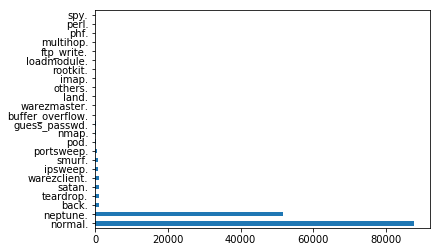

In [5]:
z=(y_train).value_counts().plot.barh()

In [6]:
s = Sampling(x_train,y_train)

# OVER SAMPLING PROCESS

In [7]:
data_for_modelling = s.Rand_Over_Samp(x_train,y_train)


In [8]:
np.shape(data_for_modelling)

(2107536, 46)

In [9]:
y_train=data_for_modelling.label


In [10]:
x_train=data_for_modelling.iloc[:,0:45]

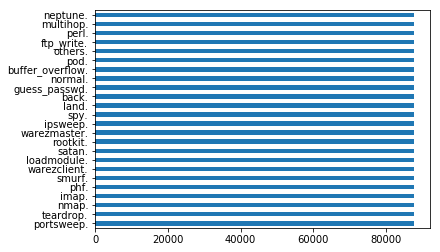

In [11]:
z=(y_train).value_counts().plot.barh()

In [12]:
clf=Model(x_train,y_train)

In [13]:
rf=clf.randforest(x_train,y_train)
predict_train_rf=rf.predict(x_train)


In [14]:
(predict_train_rf==y_train).mean()

0.99999003575739631

In [17]:
predict_test_rf=rf.predict(x_test)

In [21]:
predict_test_rf

array(['normal.', 'normal.', 'normal.', ..., 'normal.', 'normal.',
       'normal.'], dtype=object)

In [19]:
print(f1_score(y_test, predict_test_rf,average=None))
(predict_test_rf==y_test).mean()

[ 0.          0.99772417  0.          0.          0.          0.          0.
  0.93896714  0.70588235  0.          0.          0.          0.          0.
  0.99807262  0.7         0.8346969   0.          0.4         0.66666667
  0.89839572  0.90322581  0.          0.          0.          0.          0.8012789
  0.          0.99995125  0.          0.          0.          0.39344262
  0.          0.          0.00124533  0.          0.          0.          0.        ]


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.91936738814511876

In [31]:
len(set(y_train))

24

In [32]:
cross_val_score_rf=k_fold_crossval_mlt(rf,x_train,y_train,3)

24
24
24


In [33]:
cross_val_score_rf

array([ 1.        ,  0.99998292,  0.99999427,  1.        ,  0.99999432,
        0.99999427,  0.99999427,  1.        ,  1.        ,  0.9999771 ,
        1.        ,  0.99958418,  0.99971484,  1.        ,  1.        ,
        0.9999943 ,  0.99998867,  0.99998865,  0.99999428,  1.        ,
        1.        ,  1.        ,  0.99995451,  1.        ])

# UNDER SAMPLING PROCESS

In [34]:
data_for_modelling = s.Rand_Under_Samp(x_train,y_train)

In [41]:
np.shape(data_for_modelling)

(48, 46)

In [35]:
y_train=data_for_modelling.label

In [36]:
x_train=data_for_modelling.iloc[:,0:45]

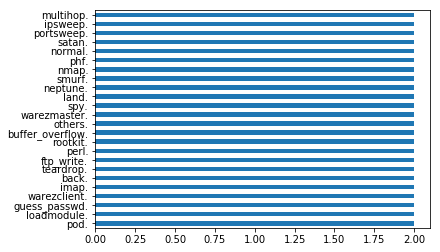

In [37]:
z=(y_train).value_counts().plot.barh()

In [20]:
#saving Model

In [22]:
joblib.dump(rf,'random_forest_mult_over_samp.pkl')

['random_forest_mult_over_samp.pkl']